## RQ1: When was safetensors beginning to be applied/used? 
    We know the date when safetensors was released, however we do not currently have an understanding of how fast safetensors was adopted as a serialization format for models. In this question, we aim to understand when people begun using safetensors in their repositories.

### Read the data first

In [ ]:
from pathlib import Path
import pandas as pd
import os


df = pd.read_csv(Path('../../results/repository_evolution_0-4920_MERGED.csv'))
df2 = pd.read_csv(Path('../../data/huggingface_sort_by_createdAt_top996939_commits_0_1035.csv'))

# grabs the date from df2 and adds it to df based on commit_hash and repo_url matching, implementation needs to be efficient
def add_date_to_df(df, df2):
    df['date'] = ""
    for index, row in df.iterrows():
        commit_hash = row['commit_hash']
        repo_url = row['repo_url']
        date = df2.loc[(df2['commit_hash'] == commit_hash) & (df2['repo_url'] == repo_url)]['date']
        if not date.empty:
            df.at[index, 'date'] = date.values[0]
    return df

df = add_date_to_df(df, df2)


### Visualization of serialization format over the years

/var/folders/cw/6strsjk52m3f3jfpzgyc4ktc0000gq/T/ipykernel_46292/1161954713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_date['date'] = pd.to_datetime(df_by_date['date'])
/var/folders/cw/6strsjk52m3f3jfpzgyc4ktc0000gq/T/ipykernel_46292/1161954713.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_by_date.loc[:, 'year'] = df_by_date['date'].dt.year


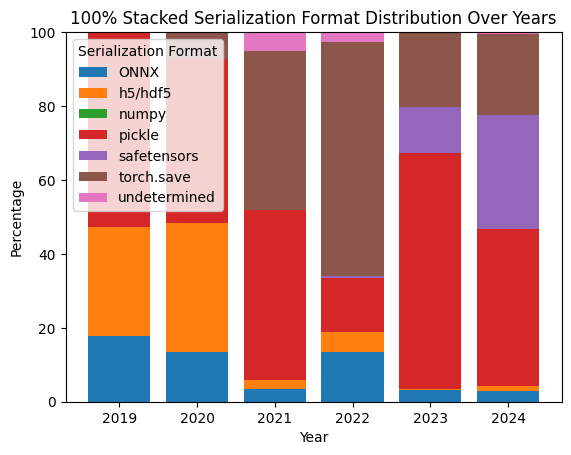

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Sample data
df_by_date = df[['date', 'serialization_format']]

# Convert the 'date' column to datetime and extract the year
df_by_date['date'] = pd.to_datetime(df_by_date['date'])
df_by_date.loc[:, 'year'] = df_by_date['date'].dt.year

# Group by year and serialization format, then count occurrences
grouped = df_by_date.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots()

# Cumulative values for stacked bars
cumulative_values = np.zeros(len(grouped_percentage))

for serialization_format in grouped_percentage.columns:
    ax.bar(grouped_percentage.index, grouped_percentage[serialization_format], 
           bottom=cumulative_values, label=serialization_format)
    cumulative_values += grouped_percentage[serialization_format]

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('100% Stacked Serialization Format Distribution Over Years')
ax.legend(title='Serialization Format')


plt.show()


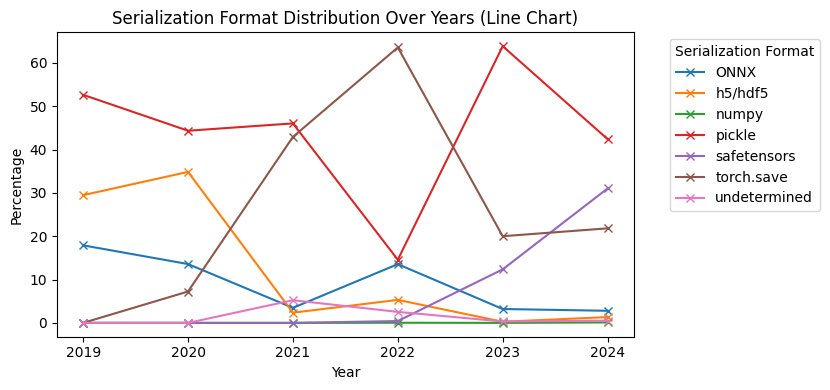

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and serialization format, then count occurrences
grouped = df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 4)) 

# Plot lines for each serialization format
for serialization_format in grouped_percentage.columns:
    ax.plot(grouped_percentage.index, grouped_percentage[serialization_format], marker='x', label=serialization_format)

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('Serialization Format Distribution Over Years')
# ax.legend(title='Serialization Format')
# Move the legend outside of the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rectangle to fit the legend

plt.show()



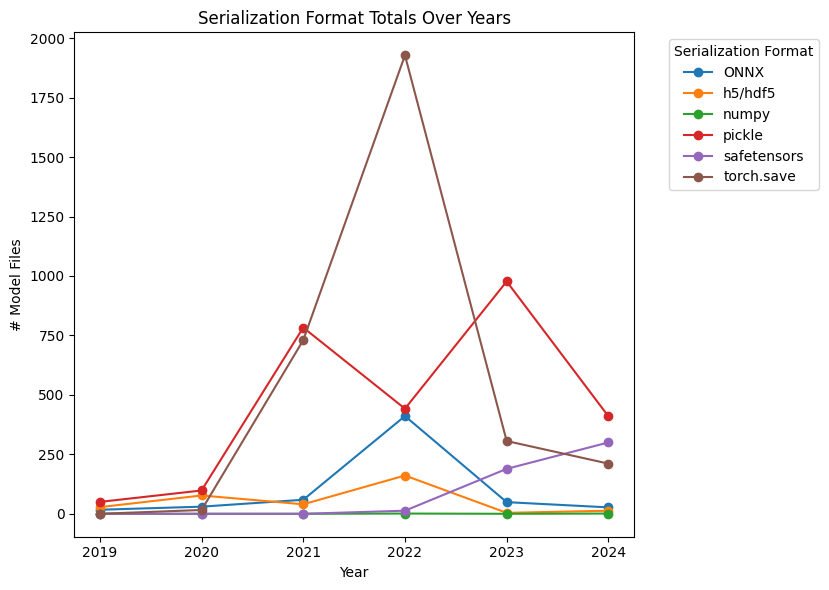

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Filter out rows with 'undetermined' serialization format
filtered_df = df[df['serialization_format'] != 'undetermined']
# Group by year and serialization format, then count occurrences
grouped_counts = filtered_df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Set the size of the figure (width, height)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust width and height as needed

# Plot the line chart with counts
for serialization_format in grouped_counts.columns:
    ax.plot(grouped_counts.index, grouped_counts[serialization_format], marker='o', label=serialization_format)

# Add labels and title
ax.set_ylabel('# Model Files')
ax.set_xlabel('Year')
ax.set_title('Serialization Format Totals Over Years')

# Move the legend outside of the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
